In [3]:
! pip install wget

In [4]:
import wget
url= 'https://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
fruits =  np.load('fruits_300_data')

In [7]:
fruits.shape, type(fruits)

((300, 100, 100), numpy.ndarray)

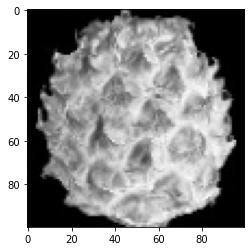

In [8]:
# 이미지는 
plt.imshow(fruits[100],cmap='gray')
plt.show()

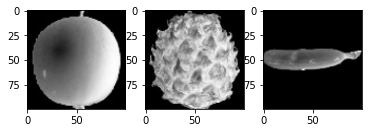

In [9]:
fig, axs =  plt.subplots(1,3)
axs[0].imshow(fruits[0],cmap='gray')
axs[1].imshow(fruits[100],cmap='gray')
axs[2].imshow(fruits[200],cmap='gray')
plt.show()



In [10]:
fruits[0,0,:], fruits[0,:,0]
len(fruits[0,0,:]), len(fruits[0,:,0])

(100, 100)

In [11]:
# 300,100,100
# 100 x 100 이미지를 길이가 10,000인 1차원 넘파이 배열로 만든다

In [12]:
# 이미지 하나를 1차원
fruits[0].reshape(-1,100*100)
# 사과,파인애플,  바나나변로 묶어서 1차원 배열을 구성한다
apple =  fruits[0:100].reshape(100, 100*100)
fineApple =  fruits[100:200].reshape(100, 100*100)
banana =  fruits[200:300].reshape(100, 100*100)

In [13]:
apple.shape,  fineApple.shape, banana.shape

((100, 10000), (100, 10000), (100, 10000))

In [14]:
# 이미지(과일) 특성을 알아보기위해서 픽셀을분석
# 각 과일의 픽셀 평균값을 계산
apple.mean(axis=1), fineApple.mean(axis=1), banana.mean(axis=1)

(array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
         94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
         93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
         92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
         94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
         90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
        100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
         87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
         96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
         89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
        103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
         91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
         82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
         98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
         88.7301,  86.643 ,  96.7323,  97.2604, 

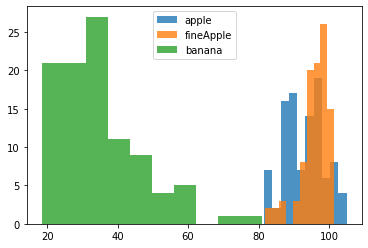

In [15]:
# 시각화
plt.hist(apple.mean(axis=1), alpha=0.8)
plt.hist(fineApple.mean(axis=1), alpha=0.8)
plt.hist(banana.mean(axis=1), alpha=0.8)
plt.legend(['apple','fineApple','banana'])
plt.show()

In [16]:
# 제공된 이미지 중에 바나나와 나머지들은 구분이 가능한 이미지이지만
# 사과하고 파인애플은 서로 겹치는 구간이 많은것을 보아 서로 이미지가 비슷하다

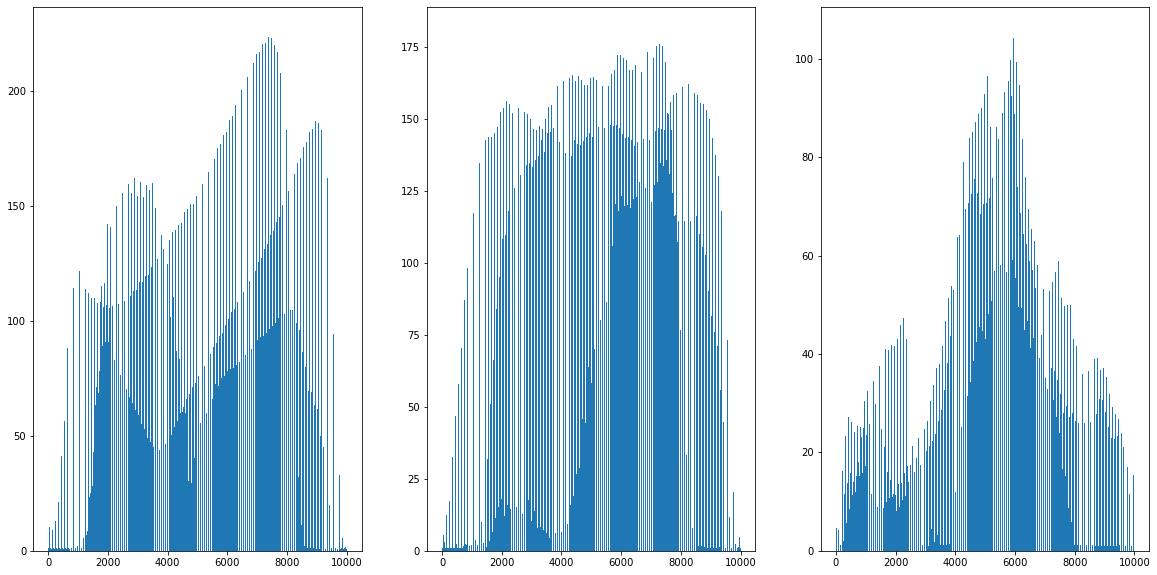

In [17]:
fig, axs =  plt.subplots(1,3, figsize=(20,10))
axs[0].bar(range(10000),apple.mean(axis=0) )
axs[1].bar(range(10000),fineApple.mean(axis=0) )
axs[2].bar(range(10000),banana.mean(axis=0) )
plt.show()

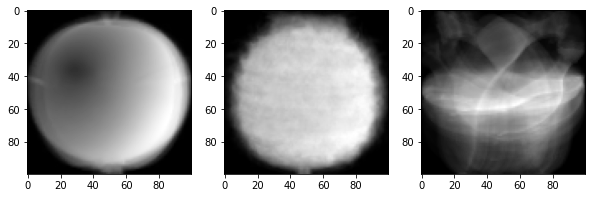

In [21]:
# apple.mean(axis=0).reshape(100,100)
fig, axs =  plt.subplots(1,3, figsize=(10,10))
axs[0].imshow(apple.mean(axis=0).reshape(100,100), cmap='gray')
axs[1].imshow(fineApple.mean(axis=0).reshape(100,100), cmap='gray')
axs[2].imshow(banana.mean(axis=0).reshape(100,100), cmap='gray')
plt.show()

# plt.imshow(apple.mean(axis=0).reshape(100,100), cmap='gray')

In [79]:
# 평균값과 가장 가까운 사진을 골르시오 - 평균제곱오차 MSE 를 사용 -sklean
# 절대값 오차
appleMean = apple.mean(axis=0).reshape(100,100)
fineAppleMean = fineApple.mean(axis=0).reshape(100,100)
bananaMean = banana.mean(axis=0).reshape(100,100)

fruits.shape, appleMean.shape, fineAppleMean.shape, bananaMean.shape

((300, 100, 100), (100, 100), (100, 100), (100, 100))

In [81]:
def diffMean(fruits, fruitsMean):
    diff = np.abs(fruits-fruitsMean)  # 300 ,100,100
    diff_mean =  np.mean(diff, axis = (1,2) )  #(300, )
    return diff_mean

app_diff_mean = diffMean(fruits,appleMean)
fineApple_diff_mean = diffMean(fruits,fineAppleMean)
banana_diff_mean = diffMean(fruits,bananaMean)

# # 전체하고 사과의 거리의 절대값
# app_diff =  np.abs(fruits-appleMean)
# ## 전체하고 사과의 거리의 절대값 의 평균
# app_diff_mean =  np.mean(app_diff, axis = (1,2) )

# # 전체하고 파인애플의 거리의 절대값
# fineApple_diff =  np.abs(fruits-fineAppleMean)
# ## 전체하고 파인애플 거리의 절대값 의 평균
# fineApple_diff_mean =  np.mean(fineApple_diff, axis = (1,2) )

# # 전체하고 바나나의 거리의 절대값
# banana_diff =  np.abs(fruits-bananaMean)
# ## 전체하고 바나나의 거리의 절대값 의 평균
# banana_diff_mean =  np.mean(banana_diff, axis = (1,2) )

In [130]:
# print(fineApple_diff_mean)
# print(np.argsort(fineApple_diff_mean))
# list_a =[5,4,3,2,1]
# list_a.index(3)
# index = np.argsort(list_a)
# index
indexs = np.argsort(fineApple_diff_mean)
temp = []
for i in range(100):
    temp.append(np.where(indexs == i))    
temp.to_list()    




AttributeError: 'list' object has no attribute 'to_list'

In [124]:
# 실제 비교하려는 이미지[:100] 사과
# 실제 비교하려는 이미지[100:200] 파인애플
# 실제 비교하려는 이미지[200:300] 바나나
app_index = np.argsort(app_diff_mean)


np.where(app_index == 1)

# real_index = np.where(app_index <100)  # 100개추출    
# real_index

# def showCluster(one_Fruits_diff_mean):    
#     app_index = np.argsort(one_Fruits_diff_mean)
#     real_index = np.where(app_index <100)  # 100개추출    
#     fig, axs =  plt.subplots(10,10, figsize=(10,10))
    
#     for i in range(10):
#         for j in range(10):
#             axs[i,j].imshow(fruits[real_index[i*10+j]], cmap='gray_r')
#             axs[i,j].axis('off')
#     plt.show()

# showCluster(app_diff_mean)
#showCluster(fineApple_diff_mean)
# showCluster(banana_diff_mean)
    
    

(array([8], dtype=int64),)

In [82]:
#diff_mean.sort()  # 정렬을 하는데 실제 정렬된 값을 적용해서 원본데이터가 정렬된 상태로 변경
#diff_mean[:50]

In [83]:
app_index = np.argsort(app_diff_mean)[:100]  # 정렬을 하나 실제 인덱스를 흐트려트리지 않고 정렬된 인덱스를 반환

In [84]:
app_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42],
      dtype=int64)

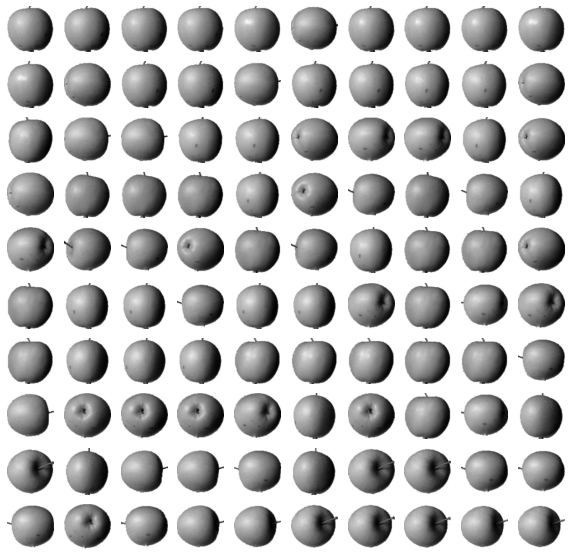

In [73]:
fig, axs =  plt.subplots(10,10, figsize=(10,10))
# axs[0,0].imshow(fruits[app_index[0]], cmap='gray_r')
# axs[0,0].axis('off')
# axs[1,0].imshow(fruits[app_index[10]], cmap='gray_r')
# axs[1,0].axis('off')
# axs[2,0].imshow(fruits[app_index[20]], cmap='gray_r')
# axs[2,0].axis('off')
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[app_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()        